# 주택 취득세 계산기 만들기

## Pandas 데이터프레임 검색

### Pandas 데이터프레임 조건 검색

#### pandas 모듈 사용

In [1]:
import pandas as pd

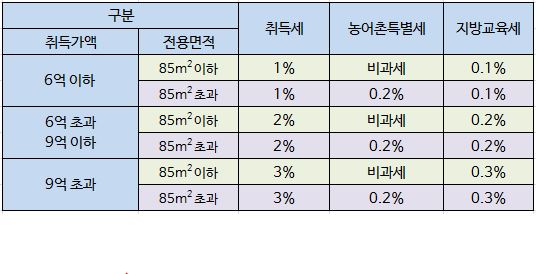

In [52]:
from IPython.display import Image
Image('data/주택취득세.JPG')

#### 주택취득세율 엑셀 읽기

In [5]:
주택취득세율 = pd.read_excel('data/주택취득세율.xlsx')
주택취득세율

,취득가액유형,전용면적,취득세,농어촌특별세,지방교육세
0,6억이하,85이하,0.01,0.000,0.001
1,6억이하,85초과,0.01,0.002,0.001
2,9억이하,85이하,0.02,0.000,0.002
3,9억이하,85초과,0.02,0.002,0.002
4,9억초과,85이하,0.03,0.000,0.003
5,9억초과,85초과,0.03,0.002,0.003


#### 취득가액이 6억 이하인 경우

In [6]:
취득가액6억이하 = 주택취득세율[주택취득세율.취득가액유형 == '6억이하']
취득가액6억이하

,취득가액유형,전용면적,취득세,농어촌특별세,지방교육세
0,6억이하,85이하,0.01,0.000,0.001
1,6억이하,85초과,0.01,0.002,0.001


#### 전용면적 85 초과인 경우

In [9]:
전용면적85초과 = 주택취득세율[주택취득세율.전용면적 == '85초과']
전용면적85초과

,취득가액유형,전용면적,취득세,농어촌특별세,지방교육세
1,6억이하,85초과,0.01,0.002,0.001
3,9억이하,85초과,0.02,0.002,0.002
5,9억초과,85초과,0.03,0.002,0.003


#### 농어촌특별세 면제 검색

In [10]:
농어촌특별세면제 = 주택취득세율[주택취득세율.농어촌특별세 == 0]
농어촌특별세면제

,취득가액유형,전용면적,취득세,농어촌특별세,지방교육세
0,6억이하,85이하,0.01,0.0,0.001
2,9억이하,85이하,0.02,0.0,0.002
4,9억초과,85이하,0.03,0.0,0.003


### Padas 데이터프레임 복수조건 검색

#### 취득가액 6억 이하 & 전용면적 85초과 검색

In [11]:
검색결과 = 주택취득세율[(주택취득세율.취득가액유형 == '6억이하') & (주택취득세율.전용면적 == '85초과')]
검색결과

,취득가액유형,전용면적,취득세,농어촌특별세,지방교육세
1,6억이하,85초과,0.01,0.002,0.001


### 특정 컬럼값 추출

In [12]:
검색결과. 취득세.item()

0.01

In [13]:
검색결과.농어촌특별세.item()

0.002

## 취득세 계산기 만들기

#### 데이터입력 : 취득가액, 전용면적

In [14]:
고객취득가액 = input('고객취득가액 : ')
고객취득가액

고객취득가액 : 100000000


'100000000'

In [15]:
고객취득가액 = int(고객취득가액)

In [16]:
고객전용면적 = input('고객전용면적 : ')
고객전용면적

고객전용면적 : 85이하


'85이하'

In [17]:
고객전용면적

'85이하'

#### if문 이용한 취득가액 유형 정의

In [21]:
고객취득가액유형 = ''

if 고객취득가액 <= 600000000:
    고객취득가액유형 = '6억이하'
elif 고객취득가액 <= 900000000:
    고객취득가액유형 = '9억이하'
else:
    고객취득가액유형 = '9억초과'
    
고객취득가액유형

'6억이하'

### 주택취득세율 엑셀파일 읽기

In [23]:
주택취득세율 = pd.read_excel('data/주택취득세율.xlsx')
주택취득세율

,취득가액유형,전용면적,취득세,농어촌특별세,지방교육세
0,6억이하,85이하,0.01,0.000,0.001
1,6억이하,85초과,0.01,0.002,0.001
2,9억이하,85이하,0.02,0.000,0.002
3,9억이하,85초과,0.02,0.002,0.002
4,9억초과,85이하,0.03,0.000,0.003
5,9억초과,85초과,0.03,0.002,0.003


### 취득세율 기준 검색

#### 고객취득가액유형 검색

In [24]:
주택취득세율[주택취득세율.취득가액유형 == 고객취득가액유형]

,취득가액유형,전용면적,취득세,농어촌특별세,지방교육세
0,6억이하,85이하,0.01,0.000,0.001
1,6억이하,85초과,0.01,0.002,0.001


#### 고객전용면적 검색

In [25]:
주택취득세율[주택취득세율.전용면적 == 고객전용면적]

,취득가액유형,전용면적,취득세,농어촌특별세,지방교육세
0,6억이하,85이하,0.01,0.0,0.001
2,9억이하,85이하,0.02,0.0,0.002
4,9억초과,85이하,0.03,0.0,0.003


#### 조건 합쳐서 검색

In [27]:
검색결과 = 주택취득세율[(주택취득세율.취득가액유형 == 고객취득가액유형) & (주택취득세율.전용면적 == 고객전용면적)]
검색결과

,취득가액유형,전용면적,취득세,농어촌특별세,지방교육세
0,6억이하,85이하,0.01,0.0,0.001


In [28]:
검색결과.취득세.item()

0.01

In [31]:
검색결과.농어촌특별세.item()

0.0

In [30]:
검색결과.지방교육세.item()

0.001

#### 계산을 위해 변수 저장

In [32]:
취득세율 = 검색결과.취득세.item()
농어촌특별세율 = 검색결과.농어촌특별세.item()
지방교육세율 = 검색결과.지방교육세.item()

#### 세액 계산

In [33]:
취득세 = round(고객취득가액 * 취득세율)
취득세

1000000

In [34]:
농어촌특별세 = round(고객취득가액 * 농어촌특별세율)
농어촌특별세

0

In [35]:
지방교육세 = round(고객취득가액 * 지방교육세율)
지방교육세

100000

In [36]:
취득세합계 = round(취득세 + 농어촌특별세 + 지방교육세)
취득세합계

1100000

In [37]:
취득세 = format(취득세, ',')
농어촌특별세 = format(농어촌특별세, ',')
지방교육세 = format(지방교육세, ',')
취득세합계 = format(취득세합계, ',')

### 계산결과 데이터프레임 출력

In [39]:
리스트 = []
리스트.append([취득세, 농어촌특별세, 지방교육세, 취득세합계])
리스트

[['1,000,000', '0', '100,000', '1,100,000']]

In [40]:
데이터프레임 = pd.DataFrame(리스트)
데이터프레임

,0,1,2,3
0,"1,000,000",0,"100,000","1,100,000"


In [41]:
데이터프레임.columns = ['취득세', '농어촌특별세', '지방교육세', '취득세합계']
데이터프레임

,취득세,농어촌특별세,지방교육세,취득세합계
0,"1,000,000",0,"100,000","1,100,000"


#### 최종결과 엑셀저장

* CH1 : 메모리에 엑셀객체 생성

In [43]:
데이터프레임_엑셀 = pd.ExcelWriter('data/주택취득세.xlsx')

* CH2 : 메모리 상 데이터프레임을 엑셀에 저장

In [44]:
데이터프레임.to_excel(데이터프레임_엑셀, '주택취득세', index = False)

* CH3 : 실제 파일 저장

In [45]:
데이터프레임_엑셀.save()